In [95]:
# Importação das bibliotecas necessárias
import imutils
import cv2
from matplotlib import pyplot as plt

In [137]:
# Definindo uma função para exibição das imagens
def show_image_in_window(title, image):
    
    # Exibe a imagem captura anteriormente
    cv2.imshow(title, image)
    
    # Aperte alguma tecla para liberar o processamento
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def show_image_in_jupyter(title, image):    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title(title)
    plt.tight_layout()    

#### Carregando e exibindo imagens

In [97]:
# Carrega a imagem de input
image = cv2.imread("jp.png")

In [98]:
# Dimensões da imagem 
# As imagens são representadas por arrays multi-dimensionais 
# Linhas x colunas x profundidade (canal RGB)
(h, w, d) = image.shape
print("witdth = {}, height = {}, depth = {}".format(w, h, d))

witdth = 600, height = 322, depth = 3


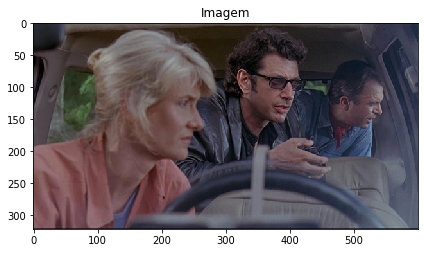

In [99]:
# Exibe a imagem
show_image_in_window_in_window("Imagem", image)
show_image_in_jupyter("Imagem", image)

#### Acessando pixels individualmente

In [100]:
# Acessa o pixel RBG localizado na posição x = 50 e y = 100
# No OpenCV as imagens são armazenadas na ordem BGR (e não RGB)
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=41, G=49, B=37


#### Aplicando slicing e cropping nas imagens

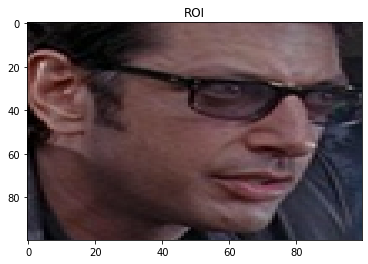

In [138]:
# Extrair ROI (áreas de interesse na imagem)

# Extrai um quadrado de 100x100 pixels da imagem
# Inicia em x = 320, y = 60 e termina em x = 420 e y = 160
roi = image[60:160, 320:420]
show_image_in_window("ROI", roi)
show_image_in_jupyter("ROI", roi)

#### Redimensionando o tamanho das imagens

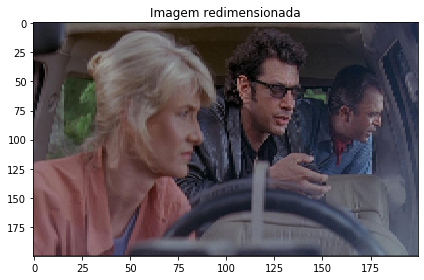

In [135]:
# Redimensiona a imagem para 200x200, ignorando o aspect ratio
resized = cv2.resize(image, (200,200))
show_image_in_window("Imagem redimensionada", resized)
show_image_in_jupyter("Imagem redimensionada", resized)

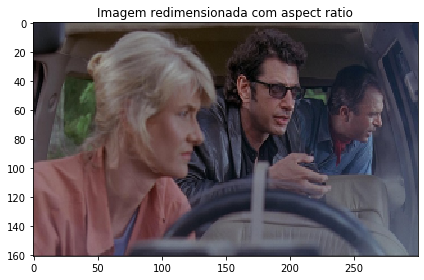

In [134]:
# Agora vamos calcular o aspect ratio para exibir a imagem corretamente sem distorções
# Redimensia o width para 300 e mantém a proporção do height
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
show_image_in_window("Imagem redimensionada com aspect ratio", resized)
show_image_in_jupyter("Imagem redimensionada com aspect ratio", resized)

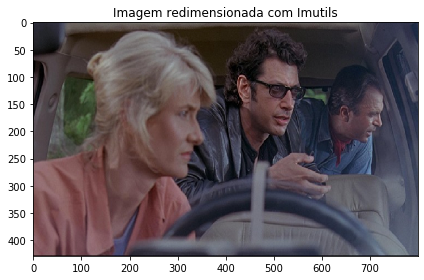

In [133]:
# Usando a biblioteca imutils para automaticamente redimensionar com o aspect ratio respeitado
resized = imutils.resize(image, width=800)
show_image_in_window("Imagem redimensionada com Imutils", resized)
show_image_in_jupyter("Imagem redimensionada com Imutils", resized)

#### Rotacionando as imagens

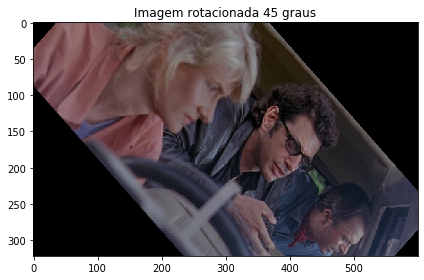

In [132]:
# Rotaciona a imagem em 45 graus

# Primeiro encontra o centro da imagem
# depois contrói a matriz rotacionada
# e por último plota a imagem
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
show_image_in_jupyter("Imagem rotacionada 45 graus", rotated)
show_image_in_window("Imagem rotacionada 45 graus", rotated)

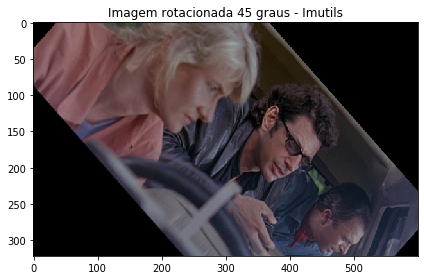

In [131]:
# Rotaciona a imagem em 45 graus (usando a biblioteca imutils)
rotated = imutils.rotate(image, -45)
show_image_in_jupyter("Imagem rotacionada 45 graus - Imutils", rotated)
show_image_in_window("Imagem rotacionada 45 graus - Imutils", rotated)

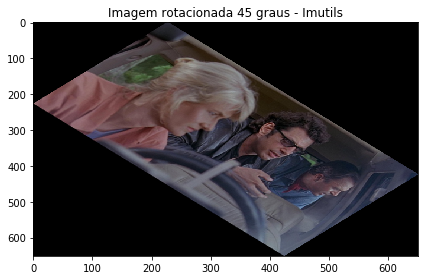

In [126]:
# Rotaciona a imagem em 45 graus (usando a biblioteca imutils)
# Neste caso, a imagem inteira é matida, sem os cortes anteriores
rotated = imutils.rotate_bound(image, 45)
show_image_in_jupyter("Imagem rotacionada 45 graus - Imutils", rotated)
show_image_in_window("Imagem rotacionada 45 graus - Imutils", rotated)

#### Desfocando imagens

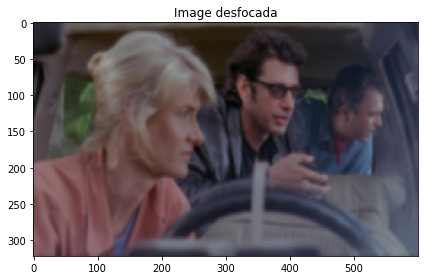

In [128]:
# Aplicando um "Gaussian Blur" na image
# Geralmente se faz essa suavização para reduzir alta frequência de ruídos
# Usamos um kernel 11 x 11 para desfocar.
# Quanto maior o kernel, mais desefocado fica o resultado
blurred = cv2.GaussianBlur(image, (11, 11), 0)
show_image_in_jupyter("Image desfocada", blurred)
show_image_in_window("Image desfocada", blurred)

#### Desenhando sobre as imagens

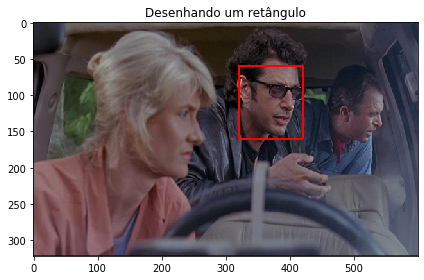

In [129]:
# Cria uma cópia da imagem original para não perdermos
output = image.copy()

# Desenhando um retângulo vermelho de borda 2x sobre a face
red = (0,0,255)
face_y = (320, 60)
face_x = (420, 160)
rectangle = cv2.rectangle(output, face_y, face_x, red, 2)
show_image_in_jupyter("Desenhando um retângulo", rectangle)
show_image_in_window("Desenhando um retângulo", rectangle)

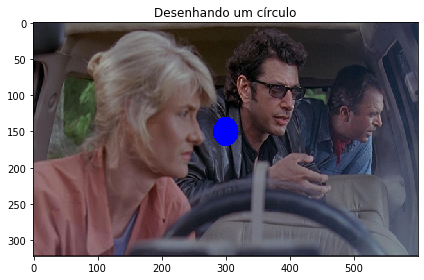

In [130]:
# Cria uma cópia da imagem original para não perdermos
output = image.copy()

# Desenhando um círculo azul sobre em frente a outra face com raio 20
blue = (255,0,0)
position = (300, 150)
circle = cv2.circle(output, position, 20, blue, -1)
show_image_in_jupyter("Desenhando um círculo", circle)
show_image_in_window("Desenhando um círculo", circle)

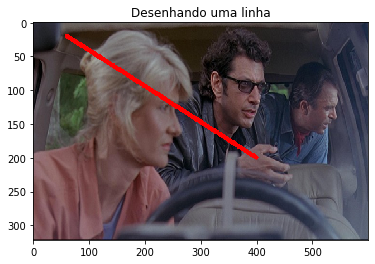

In [140]:
# Cria uma cópia da imagem original para não perdermos
output = image.copy()

# Desenhando uma linha vermelha com espessura 5px
pos_start = (60, 20)
post_end = (400, 200)
line = cv2.line(output, pos_start, post_end, red, 5)
show_image_in_jupyter("Desenhando uma linha", line)
show_image_in_window("Desenhando uma linha", line)

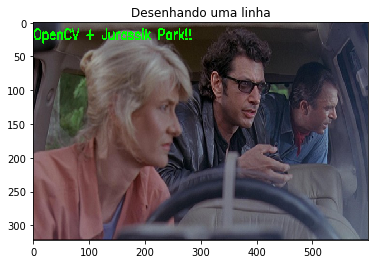

In [142]:
# Cria uma cópia da imagem original para não perdermos
output = image.copy()

# Escrevendo textos sobre a imagem
green = (0, 255, 0)
pos_start = (0, 25)
font = cv2.FONT_HERSHEY_SIMPLEX
scale = 0.7
text = cv2.putText(output, "OpenCV + Jurassik Park!!", pos_start, font, scale, green, 2)
show_image_in_jupyter("Desenhando uma linha", text)
show_image_in_window("Desenhando uma linha", text)